<a href="https://colab.research.google.com/github/nikishkaaa/Intelligent_data_analysis-UNI/blob/main/IAD_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
!pip install opendatasets --upgrade --quiet

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.metrics import roc_auc_score
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, f_classif
import opendatasets as od
from process_bank_churn import preprocess_data

### Toy dataset

In [71]:
wine = load_wine()
list(wine.target_names)

['class_0', 'class_1', 'class_2']

In [72]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [73]:
X = wine.data
y = wine.target

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [75]:
svm = SVC(kernel='linear',probability=True)
svm.fit(X_train, y_train)

train_preds = svm.predict_proba(X_train)
test_preds = svm.predict_proba(X_test)

print('Train auroc =', roc_auc_score(y_train, train_preds, multi_class='ovr'))
print('Test auroc =', roc_auc_score(y_test, test_preds, multi_class='ovr'))

Train auroc = 1.0
Test auroc = 1.0


In [76]:
train_preds_df = pd.DataFrame(train_preds)
train_preds_rounded = train_preds_df.round(2)
print(train_preds_rounded.head(10))

      0     1     2
0  0.90  0.08  0.02
1  0.92  0.03  0.04
2  0.97  0.02  0.01
3  0.96  0.01  0.03
4  0.02  0.01  0.97
5  0.01  0.01  0.98
6  0.05  0.91  0.04
7  0.03  0.01  0.95
8  0.99  0.00  0.01
9  0.98  0.01  0.01


Висновок: на всіх ознаках класифікатор SVC дуже добре працює

#### SVC with 2 random features

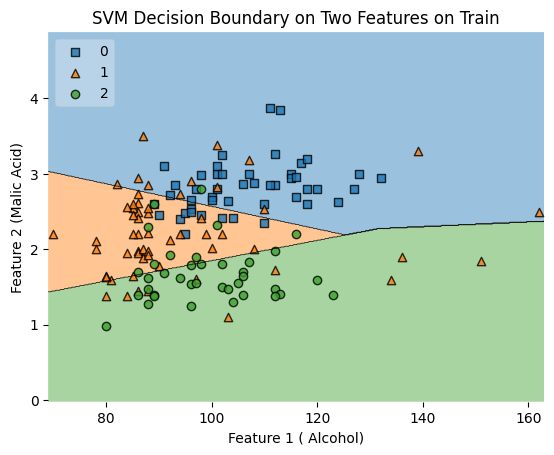

Train auroc = 0.8496695465879808
Test auroc = 0.837746743996744


In [79]:
X_subset_train = X_train[:, [4, 5]]
X_subset_test = X_test[:, [4, 5]]

svm.fit(X_subset_train, y_train)

train_preds = svm.predict_proba(X_subset_train)
test_preds = svm.predict_proba(X_subset_test)

plt.figure()
plot_decision_regions(X_subset_train, y_train, clf=svm, legend=2)
plt.xlabel('Feature 1 ( Alcohol)')
plt.ylabel('Feature 2 (Malic Acid)')
plt.title('SVM Decision Boundary on Two Features on Train')
plt.show()

print('Train auroc =', roc_auc_score(y_train, train_preds, multi_class='ovr'))
print('Test auroc =', roc_auc_score(y_test, test_preds, multi_class='ovr'))

Висновок: для двух рандомно вибраних фічах SVC працює непогано, але набагато гірше, ніж на всіх. Можна покращити результати

#### Choosing best features with ANOVA

In [80]:
k_best = SelectKBest(f_classif, k=2)
X_train = k_best.fit_transform(X_train, y_train)
X_test = k_best.transform(X_test)

In [81]:
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

train_preds = svm_model.predict_proba(X_train)
test_preds = svm_model.predict_proba(X_test)

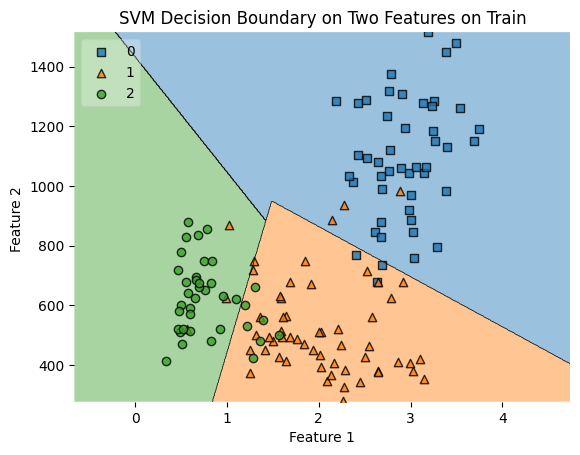

Train auroc = 0.9789460594298879
Test auroc = 0.9876204813704814


In [82]:
plt.figure()
plot_decision_regions(X_train, y_train, clf=svm_model, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2 ')
plt.title('SVM Decision Boundary on Two Features on Train')
plt.show()

print('Train auroc =', roc_auc_score(y_train, train_preds, multi_class='ovr'))
print('Test auroc =', roc_auc_score(y_test, test_preds, multi_class='ovr'))

Висновок: модель SVC на двух фічах, вибраних за допомогою ANOVA модель має дуже хороший скор

## My dataset

In [88]:
dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu/data'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: darianikishkina
Your Kaggle Key: ··········


100%|██████████| 637k/637k [00:00<00:00, 88.4MB/s]


Extracting archive ./bank-customer-churn-prediction-dlu/bank-customer-churn-prediction-dlu.zip to ./bank-customer-churn-prediction-dlu


In [89]:
df = pd.read_csv('./bank-customer-churn-prediction-dlu/train.csv')
df.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


In [93]:
numeric_cols = [
 'Age',
 'Balance',
 'CreditScore',
 'IsActiveMember',
 'EstimatedSalary']
categorical_cols = ['Geography', 'Gender','NumOfProducts' ]

In [97]:
data =  preprocess_data(df, 'Exited', scaler_numeric=True, categorical_cols=categorical_cols,numeric_cols = numeric_cols)
X_train = data['X_train']
y_train = data['train_targets']
X_test = data['X_val']
y_test = data['val_targets']

### All features

In [100]:
svm = SVC(kernel='sigmoid')
svm_model.fit(X_train, y_train)

train_preds = svm_model.predict(X_train)
test_preds = svm_model.predict(X_test)

print('Train auroc =', roc_auc_score(y_train, train_preds))
print('Test auroc =', roc_auc_score(y_test, test_preds))

Train auroc = 0.7999485104004878
Test auroc = 0.799224912545442


In [107]:
svm_model = SVC(probability=True)

param_grid = {
    'kernel': ['sigmoid', 'linear', 'poly', 'rbf']
}

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best AUC score: ", grid_search.best_score_)


best_model = grid_search.best_estimator_


train_preds = best_model.predict_proba(X_train)[:, 1]
test_preds = best_model.predict_proba(X_test)[:, 1]


print('Train AUC =', roc_auc_score(y_train, train_preds))
print('Test AUC =', roc_auc_score(y_test, test_preds))

Best parameters found:  {'kernel': 'linear'}
Best AUC score:  0.9239781236082475
Train AUC = 0.9245408736934161
Test AUC = 0.9204108649427258


Висновок: найкращий параметр для моделі SVC = {'kernel': 'linear'}. З цим параметром модель має найвищій скор та добре генералізується на нових данних